In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

from scipy.optimize import curve_fit
from tqdm.auto import trange
from tqdm import tqdm
import Metropolis_Algorithm as MA

import importlib

importlib.reload(MA)

# Setting Constants
x_0 = 0
y_0 = 0
t_i = 0
t_f = 8

mass = 1
steps = 150  # Reduced from 800 - fewer points to update
numb_paths = 1000

times = np.linspace(t_i, t_f, steps)
dt = times[1] - times[0]

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Potential
def x_potential(x):
    return 1 / 2 * x ** 2


def y_potential(x):
    return 1000 * x ** 4


def ho_analytic_pdf(x):
    return (1 / np.sqrt(np.pi)) * np.exp(-x ** 2)


def residual_calculator(x_values, model, model_parameters, y_values, y_errors):
    theoretical_values = model(x_values, *model_parameters)
    residuals = (y_values - theoretical_values) / y_errors
    return residuals

In [3]:
paths_x = np.array([
    MA.Pos_Gen(0.0, 0.0, steps, dt)
    for _ in range(numb_paths)
])

paths_orig = paths_x.copy()

Thermalizing...


Thermalising:  37%|███▋      | 185/500 [00:00<00:00, 1120.39it/s]

Endpoint acceptance ≈ 0.489
Endpoint acceptance ≈ 0.515


Thermalising:  80%|████████  | 400/500 [00:00<00:00, 1078.49it/s]

Endpoint acceptance ≈ 0.549
Endpoint acceptance ≈ 0.516


Thermalising: 100%|██████████| 500/500 [00:00<00:00, 979.99it/s] 


Endpoint acceptance ≈ 0.499

Sampling...


Sampling:   2%|▏         | 95/5000 [00:00<00:05, 961.12it/s] 

Endpoint acceptance ≈ 0.498


Sampling:   4%|▍         | 188/5000 [00:00<00:04, 1019.03it/s]

Endpoint acceptance ≈ 0.521


Sampling:   6%|▌         | 294/5000 [00:00<00:04, 948.37it/s] 

Endpoint acceptance ≈ 0.524


Sampling:   8%|▊         | 397/5000 [00:00<00:04, 1001.57it/s]

Endpoint acceptance ≈ 0.525


Sampling:  10%|▉         | 496/5000 [00:00<00:04, 1041.80it/s]

Endpoint acceptance ≈ 0.557


Sampling:  12%|█▏        | 597/5000 [00:00<00:04, 946.81it/s] 

Endpoint acceptance ≈ 0.519


Sampling:  14%|█▍        | 697/5000 [00:00<00:04, 957.79it/s] 

Endpoint acceptance ≈ 0.551


Sampling:  16%|█▌        | 800/5000 [00:00<00:04, 987.15it/s] 

Endpoint acceptance ≈ 0.505


Sampling:  18%|█▊        | 898/5000 [00:00<00:04, 999.05it/s] 

Endpoint acceptance ≈ 0.505


Sampling:  20%|█▉        | 998/5000 [00:01<00:03, 1014.45it/s]

Endpoint acceptance ≈ 0.524


Sampling:  22%|██▏       | 1098/5000 [00:01<00:03, 1108.80it/s]

Endpoint acceptance ≈ 0.512


Sampling:  24%|██▍       | 1194/5000 [00:01<00:03, 992.61it/s] 

Endpoint acceptance ≈ 0.526


Sampling:  26%|██▌       | 1297/5000 [00:01<00:03, 982.74it/s] 

Endpoint acceptance ≈ 0.518


Sampling:  28%|██▊       | 1400/5000 [00:01<00:03, 1031.51it/s]

Endpoint acceptance ≈ 0.537


Sampling:  30%|███       | 1500/5000 [00:01<00:03, 1087.65it/s]

Endpoint acceptance ≈ 0.542


Sampling:  32%|███▏      | 1600/5000 [00:01<00:03, 973.73it/s] 

Endpoint acceptance ≈ 0.512
Endpoint acceptance ≈ 0.523


Sampling:  34%|███▍      | 1701/5000 [00:01<00:03, 872.87it/s] 

Endpoint acceptance ≈ 0.522


Sampling:  38%|███▊      | 1897/5000 [00:01<00:03, 1025.20it/s]

Endpoint acceptance ≈ 0.550


Sampling:  40%|████      | 2003/5000 [00:02<00:03, 865.98it/s] 

Endpoint acceptance ≈ 0.543
Endpoint acceptance ≈ 0.550


Sampling:  42%|████▏     | 2101/5000 [00:02<00:03, 840.60it/s] 

Endpoint acceptance ≈ 0.519


Sampling:  46%|████▌     | 2295/5000 [00:02<00:02, 956.10it/s] 

Endpoint acceptance ≈ 0.526


Sampling:  48%|████▊     | 2400/5000 [00:02<00:02, 999.06it/s] 

Endpoint acceptance ≈ 0.539


Sampling:  50%|█████     | 2500/5000 [00:02<00:02, 986.19it/s] 

Endpoint acceptance ≈ 0.510


Sampling:  52%|█████▏    | 2601/5000 [00:02<00:02, 856.17it/s] 

Endpoint acceptance ≈ 0.529
Endpoint acceptance ≈ 0.514


Sampling:  58%|█████▊    | 2905/5000 [00:02<00:02, 991.64it/s] 

Endpoint acceptance ≈ 0.508
Endpoint acceptance ≈ 0.520
Endpoint acceptance ≈ 0.532


Sampling:  64%|██████▎   | 3185/5000 [00:03<00:04, 426.11it/s] 

Endpoint acceptance ≈ 0.513
Endpoint acceptance ≈ 0.501


Sampling:  78%|███████▊  | 3900/5000 [00:03<00:01, 1020.16it/s]

Endpoint acceptance ≈ 0.491
Endpoint acceptance ≈ 0.518


Sampling:  82%|████████▏ | 4102/5000 [00:04<00:01, 739.69it/s] 

Endpoint acceptance ≈ 0.517
Endpoint acceptance ≈ 0.539
Endpoint acceptance ≈ 0.512


Sampling: 100%|██████████| 5000/5000 [00:05<00:00, 979.86it/s] 


Endpoint acceptance ≈ 0.506

------ Results ------
Numerical PDF area: 1.00000
Analytic PDF area: 1.00000
Standard deviation: 0.7049 (expected ≈ 0.707)
Root mean square: 0.7049 (expected ≈ 0.707)


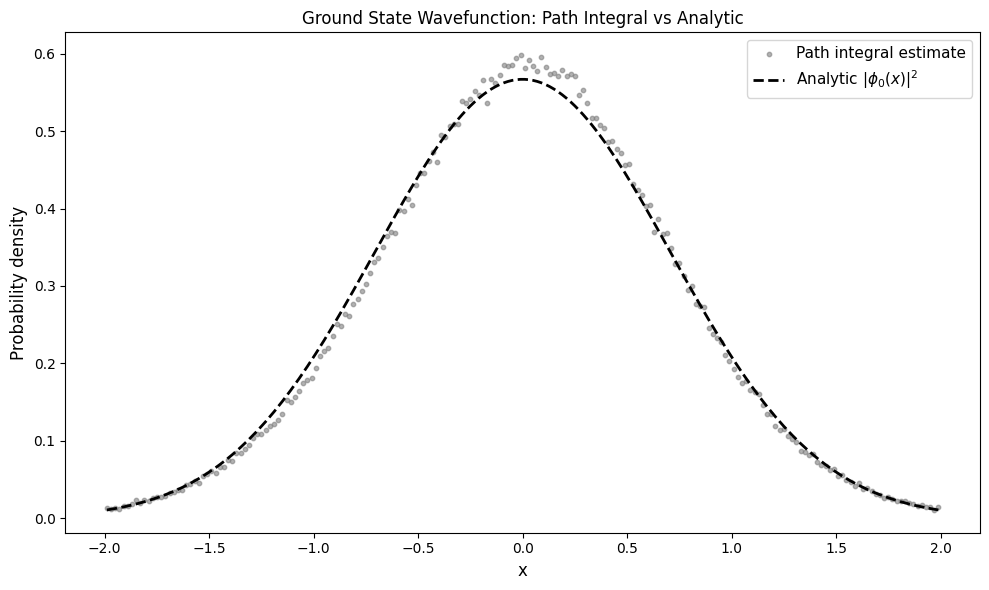

In [4]:
C = 1.8437008005694266
mid = paths_x.shape[1] // 2
thin = 10
sigma_prop = C * np.sqrt(dt)

# Thermalization
print("Thermalizing...")
for sweep in trange(500, desc="Thermalising", mininterval=0):
    acceptances, endpoint_accept = MA.metropolis_sweep_vectorised(
        paths_x, times, mass, x_potential, sigma_prop
    )

    if sweep % 100 == 0:
        tqdm.write(f"Endpoint acceptance ≈ {endpoint_accept:.3f}")

# Sampling
print("\nSampling...")
samples_x = []

for k in trange(5000, desc="Sampling", mininterval=0):
    acceptances, endpoint_accept = MA.metropolis_sweep_vectorised(
        paths_x, times, mass, x_potential, sigma_prop
    )

    if k % 100 == 0:
        tqdm.write(f"Endpoint acceptance ≈ {endpoint_accept:.3f}")

    if k % thin == 0:
        samples_x.append(paths_x[:, -1].copy())

samples_x = np.concatenate(samples_x)

# Compute PDF
x_bins = np.linspace(-2, 2, 201)
pdf_unnormalised_x, bin_edges_x = np.histogram(samples_x, bins=x_bins)

x_centres = 0.5 * (bin_edges_x[1:] + bin_edges_x[:-1])
dx = np.diff(x_bins)[0]

pdf_x = pdf_unnormalised_x / np.sum(pdf_unnormalised_x * dx)

# Analytic PDF
phi_sq_analytic_x = (1 / np.sqrt(np.pi)) * np.exp(-x_centres ** 2)
phi_sq_analytic_x /= np.sum(phi_sq_analytic_x * dx)

# Statistics
mean_square_x = np.mean(samples_x**2)
rms = np.sqrt(mean_square_x)
std = np.std(samples_x)

print("\n------ Results ------")
print(f"Numerical PDF area: {np.sum(pdf_x * dx):.5f}")
print(f"Analytic PDF area: {np.sum(phi_sq_analytic_x * dx):.5f}")
print(f"Standard deviation: {std:.4f} (expected ≈ 0.707)")
print(f"Root mean square: {rms:.4f} (expected ≈ 0.707)")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x_centres, pdf_x, label='Path integral estimate', s=10, alpha=0.6, color = 'grey')
plt.plot(x_centres, phi_sq_analytic_x, 'black',linestyle = '--', linewidth=2, label=r'Analytic $|\phi_0(x)|^2$')
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability density', fontsize=12)
plt.legend(fontsize=11)
plt.title('Ground State Wavefunction: Path Integral vs Analytic')

plt.tight_layout()
plt.show()

# Paths Plot

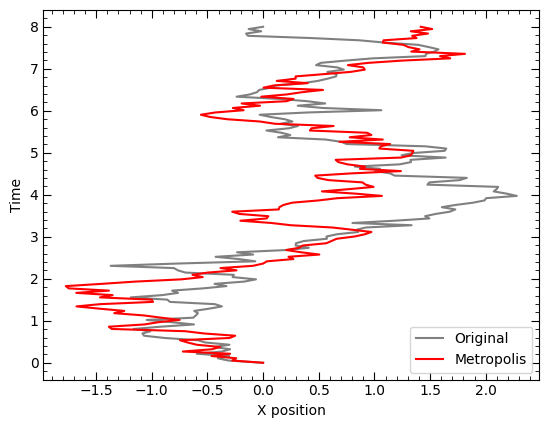

In [5]:
pc_savepath_paths_fig = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\Paths.svg"
laptop_savepath_paths_fig = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\Paths.svg"
plt.figure(1)

plt.plot(paths_orig[3],times, color = 'grey', label = "Original")
plt.plot(paths_x[3],times, color = 'red',label = "Metropolis")

plt.minorticks_on()
plt.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
plt.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

plt.xlabel('X position')
plt.ylabel('Time')
plt.legend(loc = "lower right")


plt.savefig(laptop_savepath_paths_fig, bbox_inches='tight')

plt.show()

# Action Plot

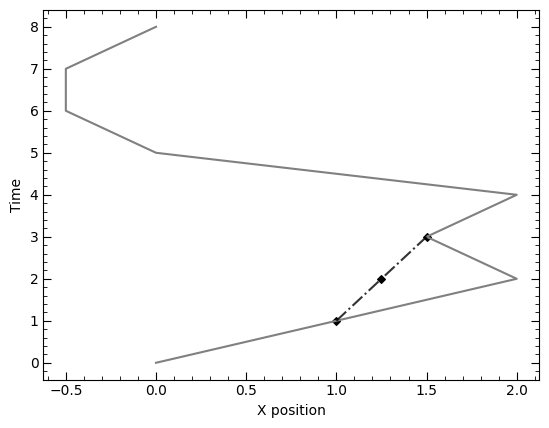

In [29]:
x_position_orig = [0,1,2,1.5,2,0,-0.5,-0.5,0]
x_position_new = [1,1.25,1.5]
time = [0,1,2,3,4,5,6,7,8]
time_change = [1,2,3]

pc_savepath_delta_S = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\delta_S.svg"
laptop_savepath_delta_S = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\delta_S.svg"
plt.figure(1)

plt.minorticks_on()
plt.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
plt.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

plt.plot(x_position_orig, time, label = "original", color = 'grey')
plt.plot(x_position_new, time_change, linestyle = "-.",label = "Change", color = "black", alpha = 0.8)
plt.scatter(x_position_new, time_change, color = "black", s = 15, marker = "D")

plt.xlabel('X position')
plt.ylabel('Time')

plt.savefig(laptop_savepath_delta_S, bbox_inches='tight')
plt.show()

# Brownian Bridge Plot

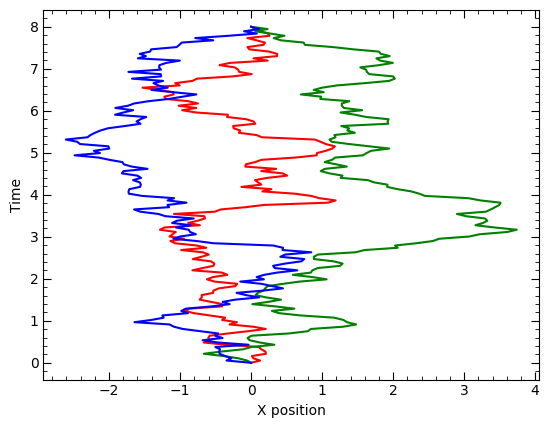

In [30]:
pc_savepath_bridge = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\bridge.svg"
laptop_savepath_bridge = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\bridge.svg"

colors = ['red', 'green', 'blue']

plt.figure(1)

plt.minorticks_on()
plt.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
plt.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

for i in range (3):
    plt.plot(paths_orig[i+20], times, colors[i])


plt.xlabel('X position')
plt.ylabel('Time')

plt.savefig(laptop_savepath_bridge, bbox_inches='tight')
plt.show()

# Combined Bridge and action plot

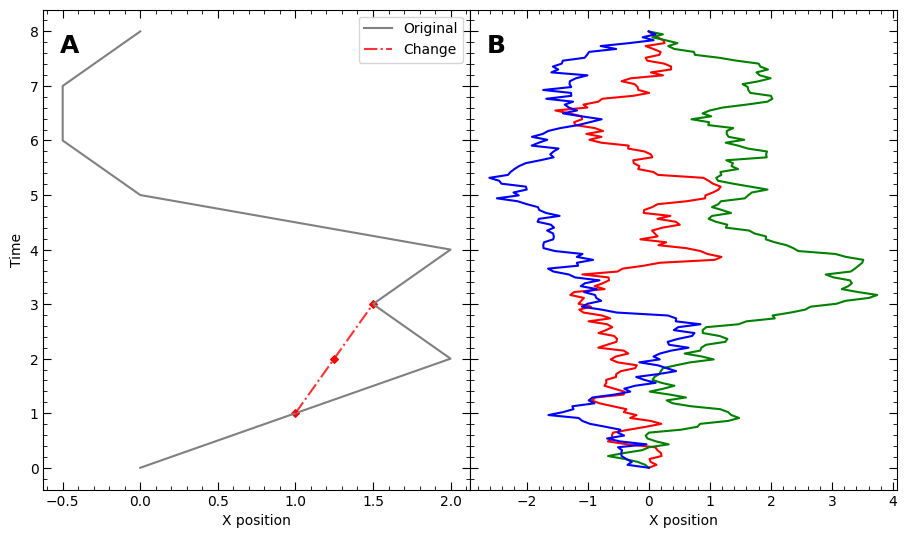

In [49]:
# Combined Plot
pc_savepath_combined = r"C:\Users\User\Documents\Durham Work\Year 3\CompPhys\combined.svg"
laptop_savepath_combined = r"C:\Users\sebas\Documents\Durham Work\Year 3\Comp Phys\combined.svg"

fig = plt.figure(1)

# Bridge Plot
ax1 = fig.add_axes([0,0,2/3,1]) #left bottom width height

ax1.minorticks_on()
ax1.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
ax1.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

ax1.set_ylabel('Time')
ax1.set_xlabel('X position')

ax1.plot(x_position_orig, time, label = "Original", color = 'grey')
ax1.plot(x_position_new, time_change, linestyle = "-.",label = "Change", color = "red", alpha = 0.8)
ax1.scatter(x_position_new, time_change, color = "red", s = 15, marker = "D")
ax1.legend()


ax1.text(
    0.04, 0.95, 'A',
    transform=ax1.transAxes,
    fontsize=18,
    fontweight='bold',
    va='top'
)

#Action Plot
f2 = fig.add_axes([2/3,0,2/3,1])

f2.minorticks_on()
f2.tick_params(which = 'major', length = 6, bottom = True, top = True, left = True, right = True, direction = 'in')
f2.tick_params(which = 'minor', length = 3, bottom = True, top = True, left = True, right = True, direction = 'in')

f2.set_yticklabels([])
f2.set_xlabel('X position')

for i in range(3):
    f2.plot(paths_orig[i+20], times, colors[i])

f2.text(
    1.04, 0.95, 'B',
    transform=ax1.transAxes,
    fontsize=18,
    fontweight='bold',
    va='top'
)

plt.savefig(laptop_savepath_combined, bbox_inches='tight')

plt.show()